# DIP Lab Assignment 04

In [1]:
!wget https://www.keystonepuppies.com/wp-content/uploads/2018/09/Golden-Retriever-Category-640x435.jpg

--2020-02-19 12:13:14--  https://www.keystonepuppies.com/wp-content/uploads/2018/09/Golden-Retriever-Category-640x435.jpg
Resolving www.keystonepuppies.com (www.keystonepuppies.com)... 67.227.148.146
Connecting to www.keystonepuppies.com (www.keystonepuppies.com)|67.227.148.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40516 (40K) [image/jpeg]
Saving to: ‘Golden-Retriever-Category-640x435.jpg’

Golden-Retriever-Ca 100%[===================>]  39.57K   132KB/s    in 0.3s    

2020-02-19 12:13:16 (132 KB/s) - ‘Golden-Retriever-Category-640x435.jpg’ saved [40516/40516]



In [2]:
!ls

 AP17110010004_DIP_02.ipynb   AP17110010004_DIP_04.ipynb
 AP17110010004_DIP_02.pdf    'Assignment 1.pdf'
 AP17110010004_DIP_03.ipynb   Golden-Retriever-Category-640x435.jpg
 AP17110010004_DIP_03.pdf


In [3]:
!mv Golden-Retriever-Category-640x435.jpg dog.jpg

## Question 1

## Develop programs to implement frequency domain smoothing filters (Ideal, Butterworth and Gaussian) and apply these filters on a gray scale image.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

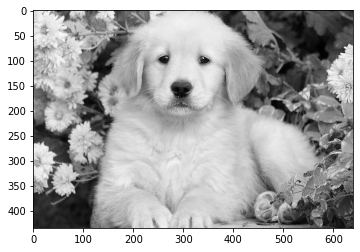

In [3]:
img = cv2.imread("dog.jpg", 0)
plt.imshow(img, "gray")

In [4]:
# calculating distance between a point(u,v) [point1] in the frequency domain and the center [point2] of the frequency rectangle

def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

In [7]:
#D0 = radii value/cut-off frequency

def ideal_LowPass(D0, image_shape):
    new = np.zeros(image_shape[:2])
    rows, cols = image_shape[:2]
    center = (rows/2, cols/2)
    
    for v in range(cols):
        for u in range(rows):
            if distance((u,v), center) < D0:
                new[u,v] = 1
    return new


def butterworth_LowPass(D0, image_shape, n):      #n = order of filter
    new = np.zeros(image_shape[:2])
    rows, cols = image_shape[:2]
    center = (rows/2, cols/2)
    
    for v in range(cols):
        for u in range(rows):
            new[u,v] = 1/(1+(distance((u,v), center)/D0)**(2*n))
    return new


def gaussian_LowPass(D0, image_shape):
    new = np.zeros(image_shape[:2])
    rows, cols = image_shape[:2]
    center = (rows/2, cols/2)
    
    for v in range(cols):
        for u in range(rows):
            new[u,v] = np.exp(((-distance((u,v), center)**2)/(2*(D0**2))))
    return new

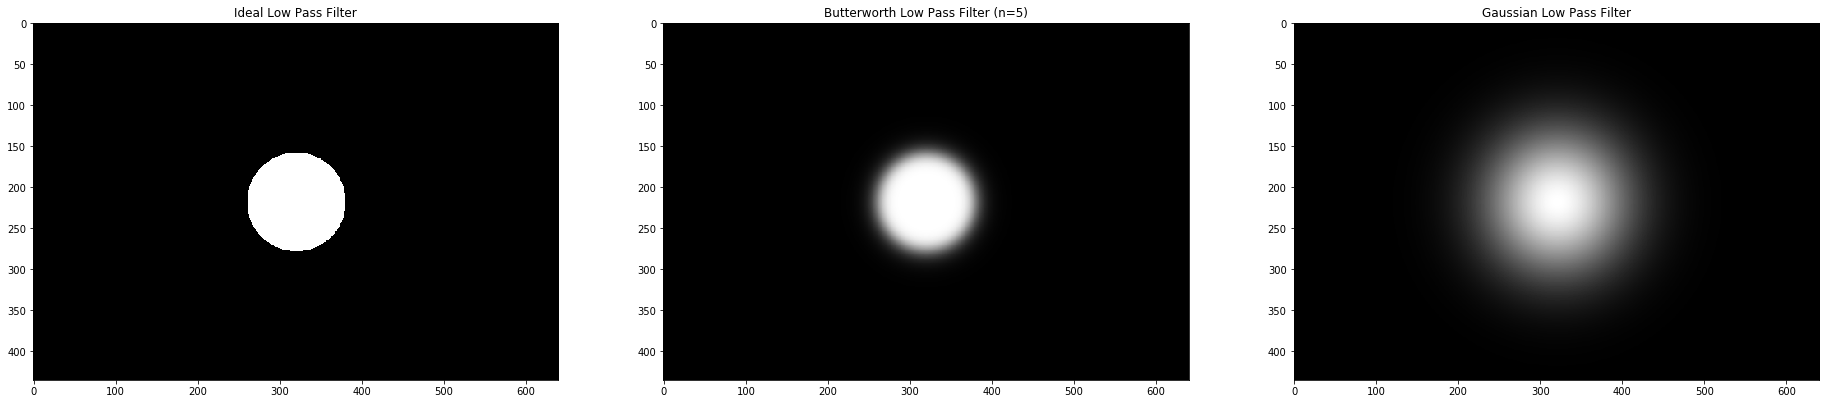

In [8]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

IdealLPfilter = ideal_LowPass(60, img.shape)
plt.subplot(131), plt.imshow(IdealLPfilter, "gray"), plt.title("Ideal Low Pass Filter")

ButterworthLPfilter = butterworth_LowPass(60,img.shape,5)
plt.subplot(132), plt.imshow(ButterworthLPfilter, "gray"), plt.title("Butterworth Low Pass Filter (n=5)")

GaussianLPfilter = gaussian_LowPass(60,img.shape)
plt.subplot(133), plt.imshow(GaussianLPfilter, "gray"), plt.title("Gaussian Low Pass Filter")

plt.show()

### 1.a) Compare/comment on the output of Ideal, Butterworth and Gaussian Low pass Filters having the same radii (cutoff frequency) value.

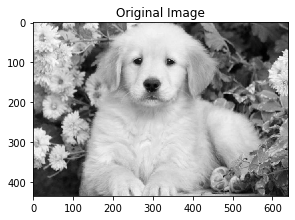


Radii/Cutoff Frequency = 60


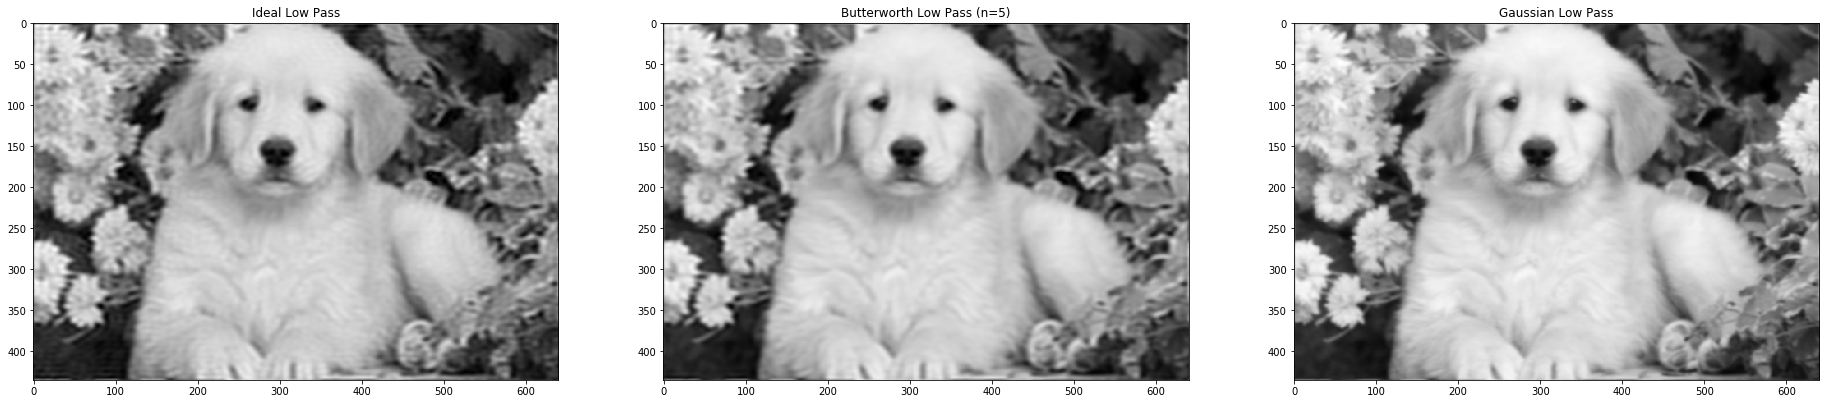

In [10]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

plt.show()

original = np.fft.fft2(img)          #Fourier Transform of the image
center = np.fft.fftshift(original)   #Shifting the zero-frequency component to the center of the spectrum

print("\nRadii/Cutoff Frequency = 60")

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

#Ideal Low Pass Filter
LowPassCenter = center * ideal_LowPass(60,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(131), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Ideal Low Pass")

#Butterworth Low Pass Filter
LowPassCenter = center * butterworth_LowPass(60,img.shape,5)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (n=5)")

#Gaussian Low Pass Filter
LowPassCenter = center * gaussian_LowPass(60,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(133), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

plt.show()

### 1.b) Consider a suitable gray scale image and demonstrate the ringing effect on the output of Ideal low pass frequency domain filter.

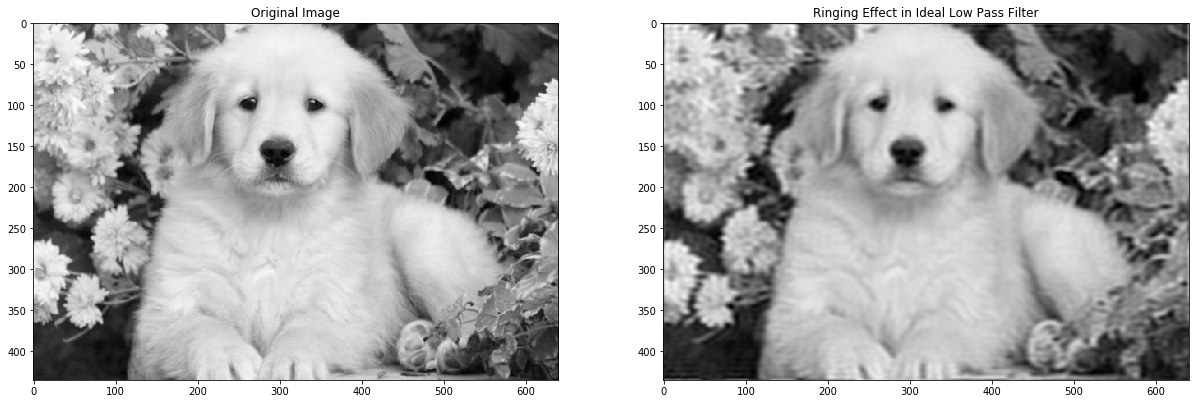

In [11]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

#Original Image
plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

#Ideal Low Pass
LowPassCenter = center * ideal_LowPass(60,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Ringing Effect in Ideal Low Pass Filter")

plt.show()

### 1.c) Compare the output of Butterworth low pass filters (order n=2) for different cut-off frequencies (5, 15, 30, 90, 120).

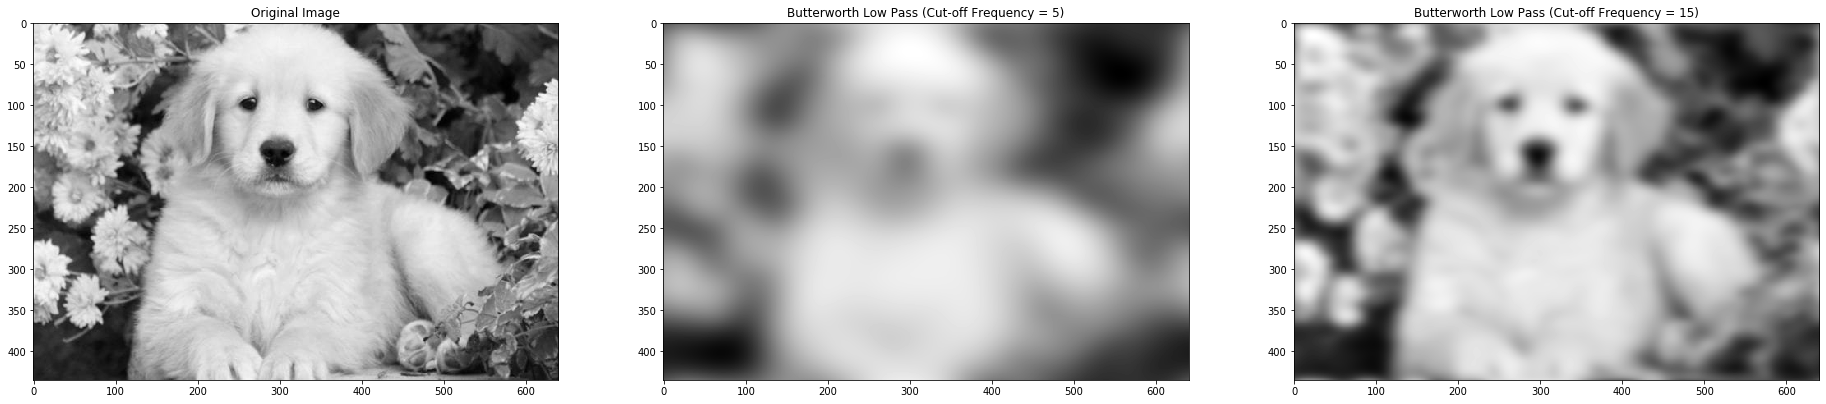

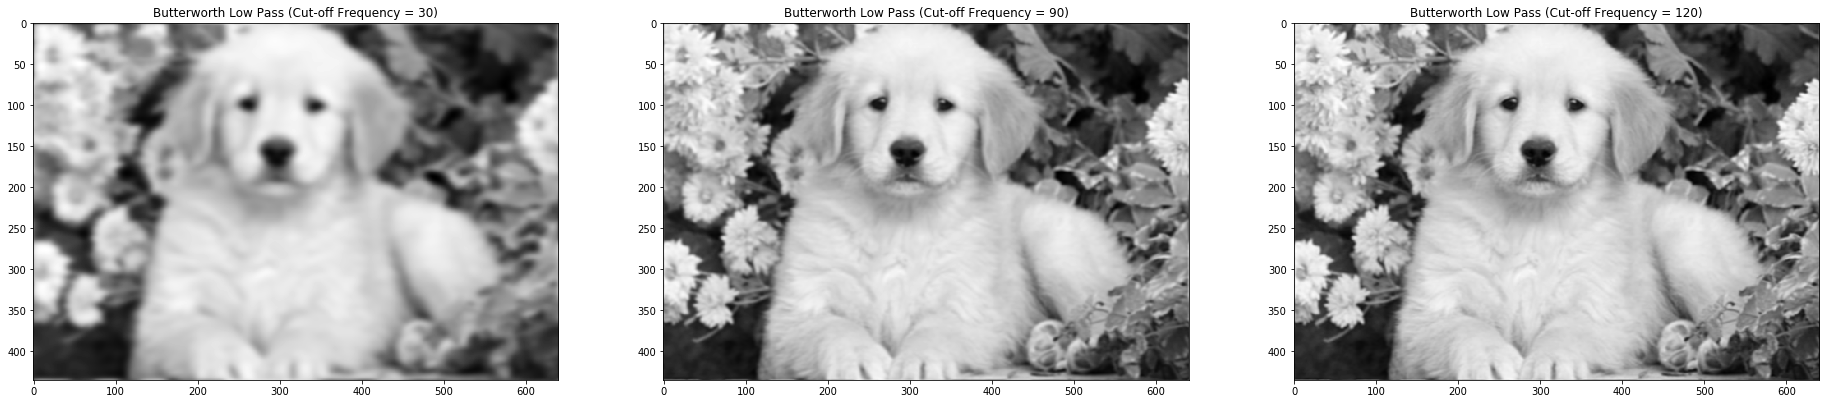

In [12]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

#Original Image
plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")


#Butterworth Low Pass (Cut-off Frequency = 5)
LowPassCenter = center * butterworth_LowPass(5,img.shape,2)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (Cut-off Frequency = 5)")


#Butterworth Low Pass (Cut-off Frequency = 15)
LowPassCenter = center * butterworth_LowPass(15,img.shape,2)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(133), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (Cut-off Frequency = 15)")


plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

#Butterworth Low Pass (Cut-off Frequency = 30)
LowPassCenter = center * butterworth_LowPass(30,img.shape,2)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(231), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (Cut-off Frequency = 30)")


#Butterworth Low Pass (Cut-off Frequency = 90)
LowPassCenter = center * butterworth_LowPass(90,img.shape,2)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(232), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (Cut-off Frequency = 90)")


#Butterworth Low Pass (Cut-off Frequency = 120)
LowPassCenter = center * butterworth_LowPass(120,img.shape,2)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(233), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (Cut-off Frequency = 120)")

plt.show()

### 1.d) Compare the output of Gaussian low pass filters for different cut-off frequencies (5, 15, 30, 90, and 120).

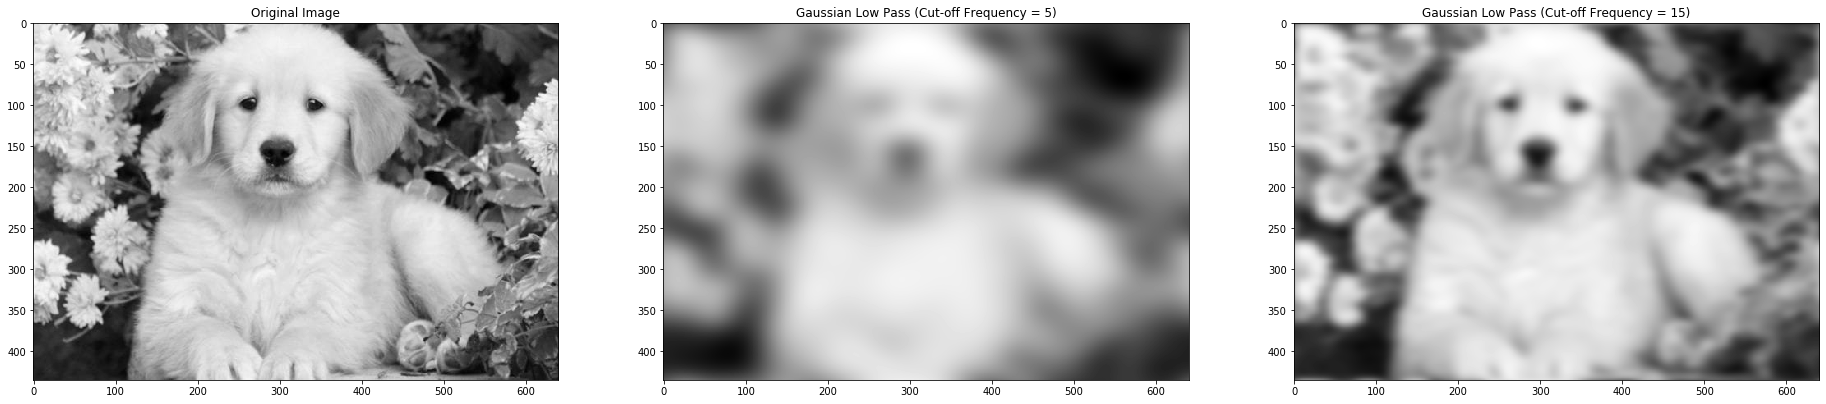

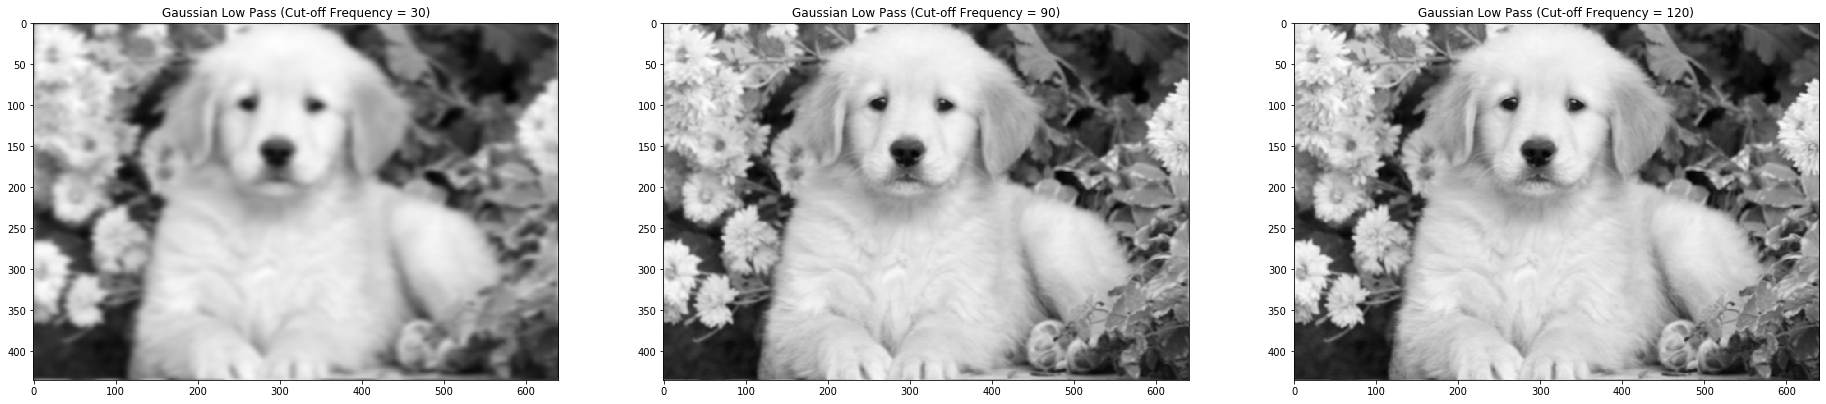

In [13]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

#Original Image
plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")


#Gaussian Low Pass (Cut-off Frequency = 5)
LowPassCenter = center * gaussian_LowPass(5,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass (Cut-off Frequency = 5)")


#Gaussian Low Pass (Cut-off Frequency = 15)
LowPassCenter = center * gaussian_LowPass(15,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(133), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass (Cut-off Frequency = 15)")


plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

#Gaussian Low Pass (Cut-off Frequency = 30)
LowPassCenter = center * gaussian_LowPass(30,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(231), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass (Cut-off Frequency = 30)")


#Gaussian Low Pass (Cut-off Frequency = 90)
LowPassCenter = center * gaussian_LowPass(90,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(232), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass (Cut-off Frequency = 90)")


#Gaussian Low Pass (Cut-off Frequency = 120)
LowPassCenter = center * gaussian_LowPass(120,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(233), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass (Cut-off Frequency = 120)")

plt.show()

## Question 2

## Develop programs to implement frequency domain sharpening/High pass filters (Ideal, Butterworth and Gaussian) and apply these filters on a gray scale image.

In [17]:
#D0 = radii value/cut-off frequency

def ideal_HighPass(D0, image_shape):
    new = np.ones(image_shape[:2])
    rows, cols = image_shape[:2]
    center = (rows/2,cols/2)

    for v in range(cols):
        for u in range(rows):
            if distance((u,v), center) < D0:
                new[u,v] = 0
    return new


def butterworth_HighPass(D0,image_shape,n):      #n = order of filter
    new = np.zeros(image_shape[:2])
    rows, cols = image_shape[:2]
    center = (rows/2,cols/2)
    
    for v in range(cols):
        for u in range(rows):
            new[u,v] = 1-1/(1+(distance((u,v), center)/D0)**(2*n))
    return new


def gaussian_HighPass(D0, image_shape):
    new = np.zeros(image_shape[:2])
    rows, cols = image_shape[:2]
    center = (rows/2,cols/2)

    for v in range(cols):
        for u in range(rows):
            new[u,v] = 1 - np.exp(((-distance((u,v), center)**2)/(2*(D0**2))))
    return new

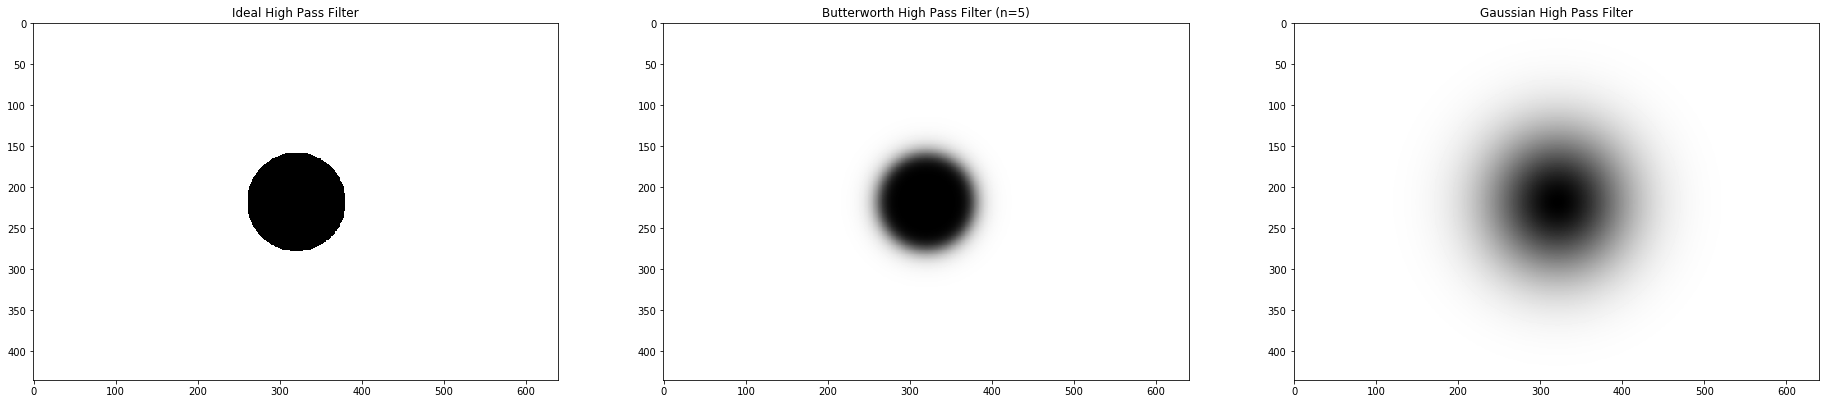

In [18]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

IdealHPfilter = ideal_HighPass(60,img.shape)
plt.subplot(131), plt.imshow(IdealHPfilter, "gray"), plt.title("Ideal High Pass Filter")

ButterHPfilter = butterworth_HighPass(60,img.shape,5)
plt.subplot(132), plt.imshow(ButterHPfilter, "gray"), plt.title("Butterworth High Pass Filter (n=5)")

GaussianHPfilter = gaussian_HighPass(60,img.shape)
plt.subplot(133), plt.imshow(GaussianHPfilter, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

### 2.a) Compare/comment on the output of Ideal, Butterworth and Gaussian High pass Filters having the same radii (cutoff frequency) value.

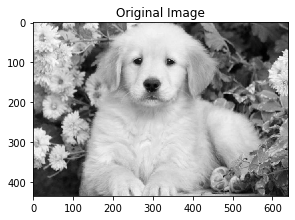


Radii/Cutoff Frequency = 60


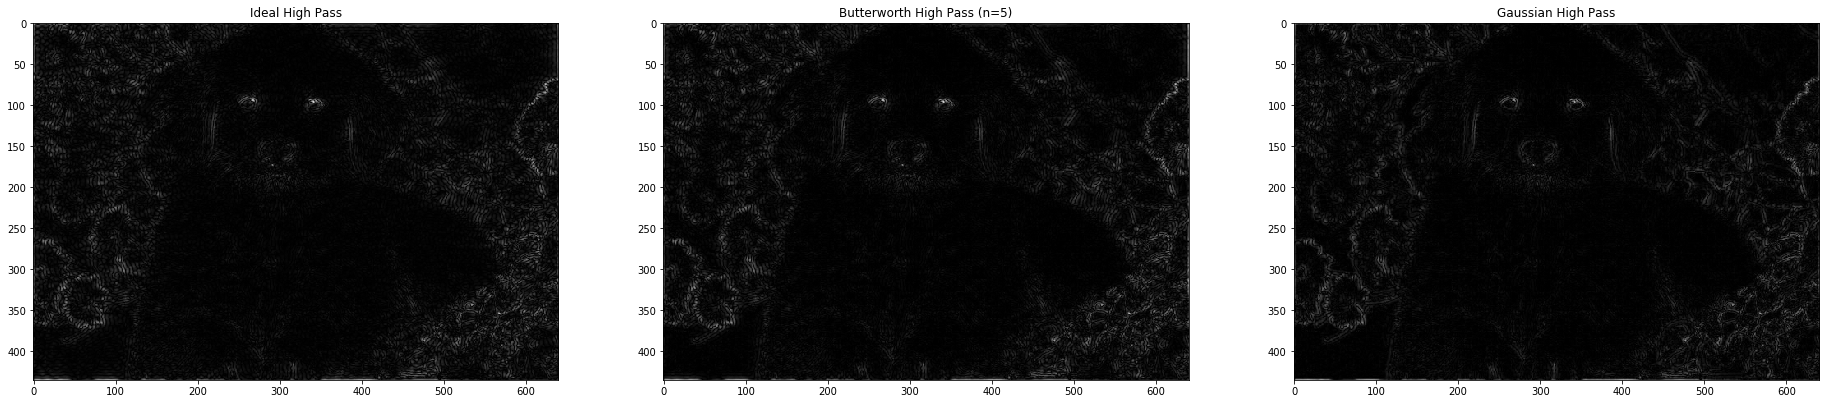

In [19]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

plt.show()

original = np.fft.fft2(img)
center = np.fft.fftshift(original)

print("\nRadii/Cutoff Frequency = 60")

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

#Ideal High Pass Filter
HighPassCenter = center * ideal_HighPass(60,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(131), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Ideal High Pass")

#Butterworth High Pass Filter
HighPassCenter = center * butterworth_HighPass(60,img.shape,5)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass (n=5)")

#Gaussian High Pass Filter
HighPassCenter = center * gaussian_HighPass(60,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

### 2.b) Consider a suitable gray scale image and demonstrate the ringing effect on the output of Ideal high pass frequency domain filter.

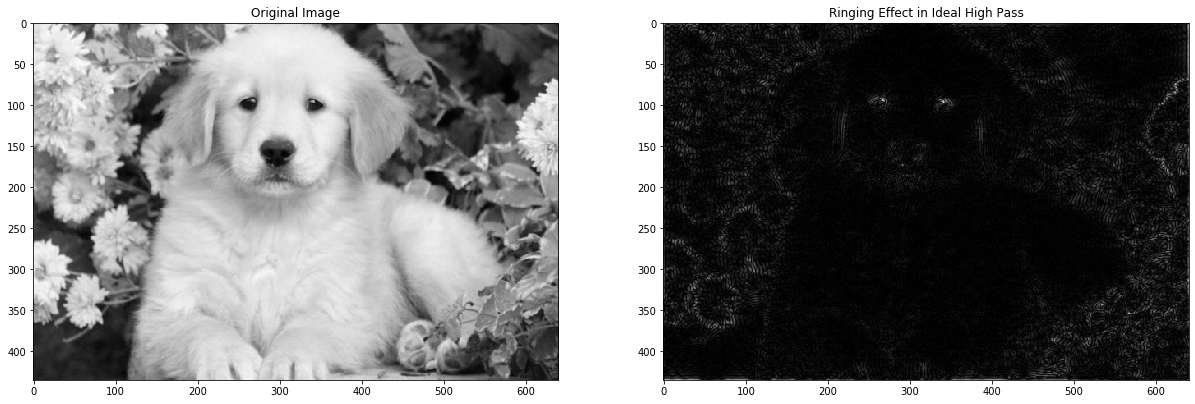

In [20]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

#Original Image
plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

#Ideal High Pass
HighPassCenter = center * ideal_HighPass(60,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Ringing Effect in Ideal High Pass")

plt.show()

### 2.c) Compare the output of Butterworth high pass filters (order n=2) for different cut-off frequencies (5, 15, 30, 90, 120).

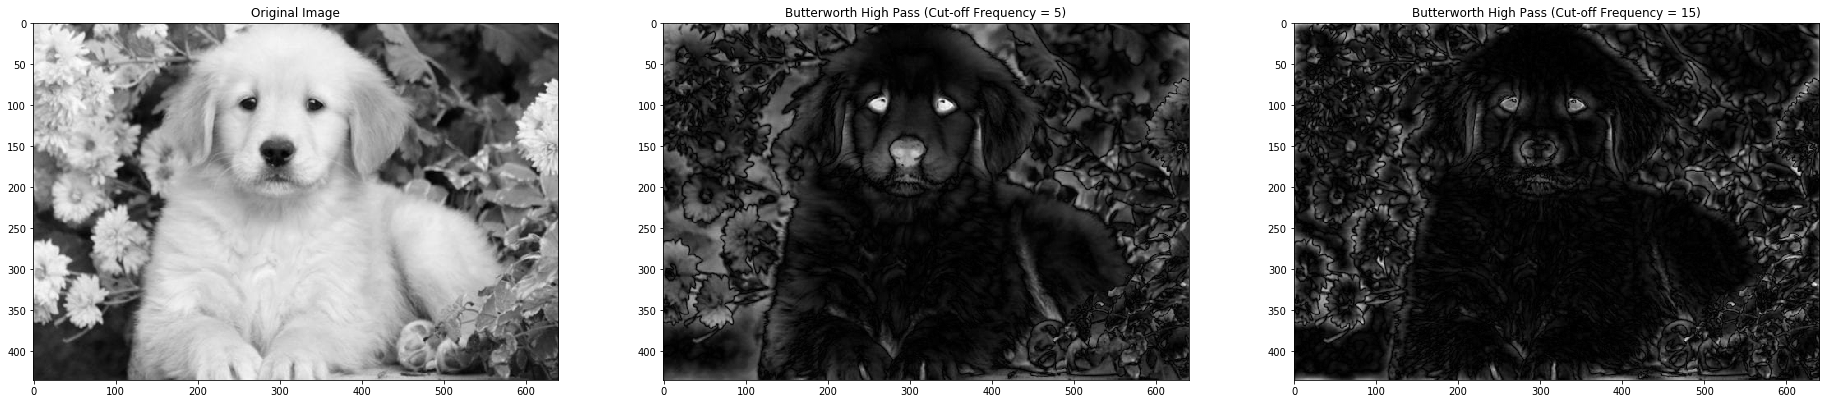

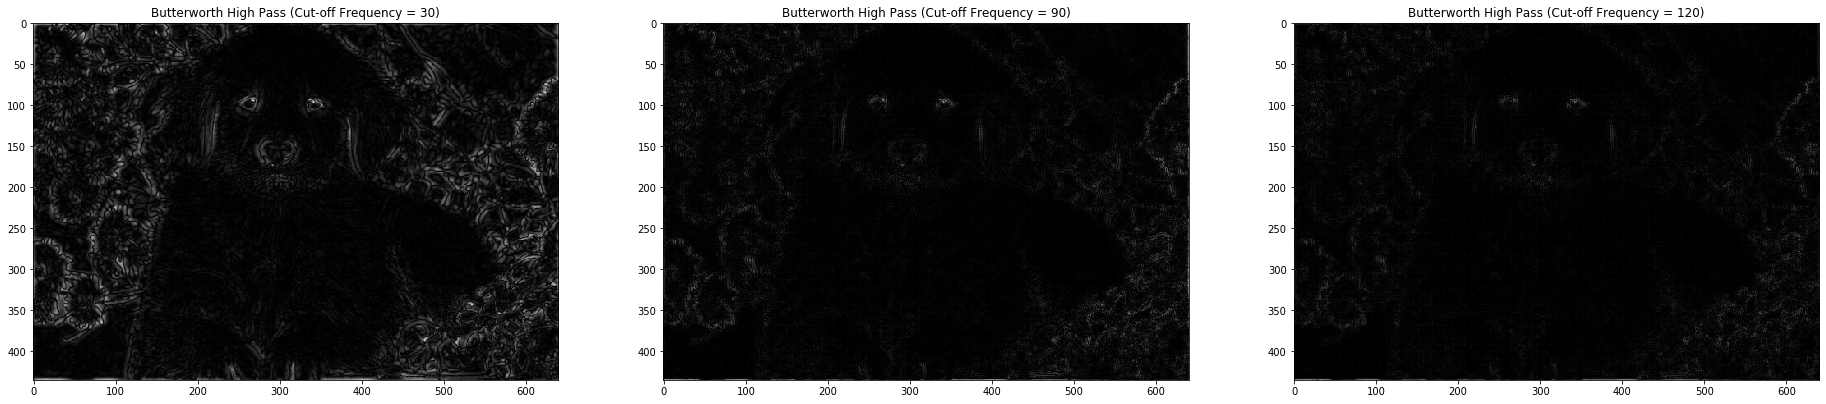

In [21]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

#Original Image
plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")


#Butterworth High Pass (Cut-off Frequency = 5)
HighPassCenter = center * butterworth_HighPass(5,img.shape,2)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass (Cut-off Frequency = 5)")


#Butterworth High Pass (Cut-off Frequency = 15)
HighPassCenter = center * butterworth_HighPass(15,img.shape,2)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass (Cut-off Frequency = 15)")


plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

#Butterworth High Pass (Cut-off Frequency = 30)
HighPassCenter = center * butterworth_HighPass(30,img.shape,2)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(231), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass (Cut-off Frequency = 30)")


#Butterworth High Pass (Cut-off Frequency = 90)
HighPassCenter = center * butterworth_HighPass(90,img.shape,2)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(232), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass (Cut-off Frequency = 90)")


#Butterworth High Pass (Cut-off Frequency = 120)
HighPassCenter = center * butterworth_HighPass(120,img.shape,2)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(233), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass (Cut-off Frequency = 120)")

plt.show()

### 2.d) Compare the output of Gaussian high pass filters for different cut-off frequencies (5, 15, 30, 90, and 120).

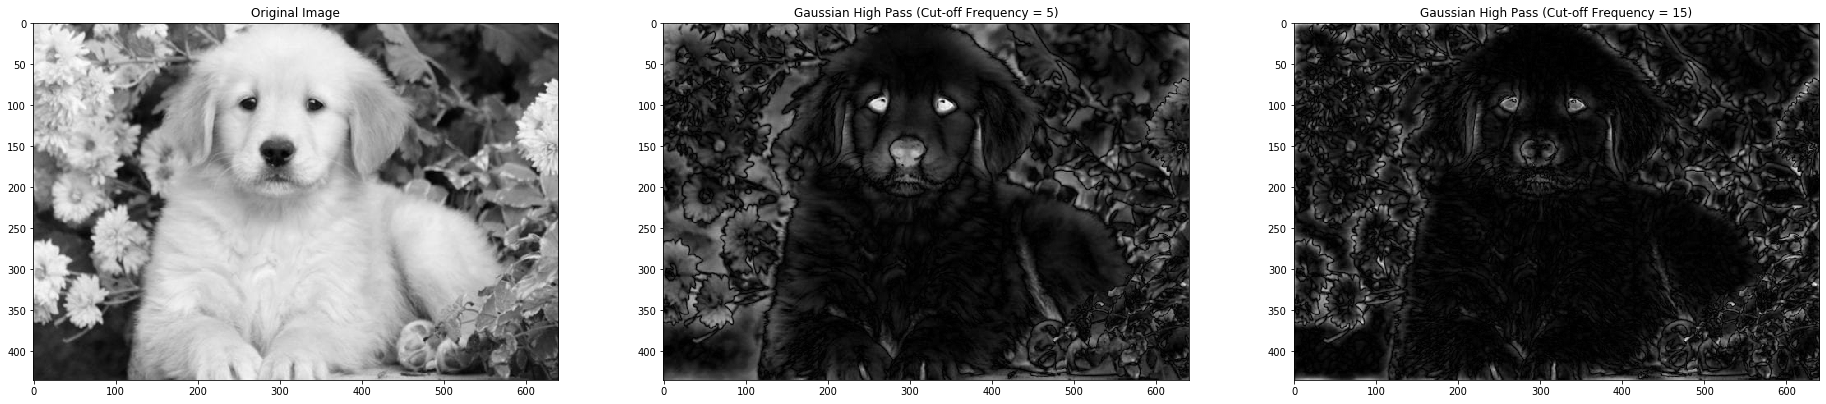

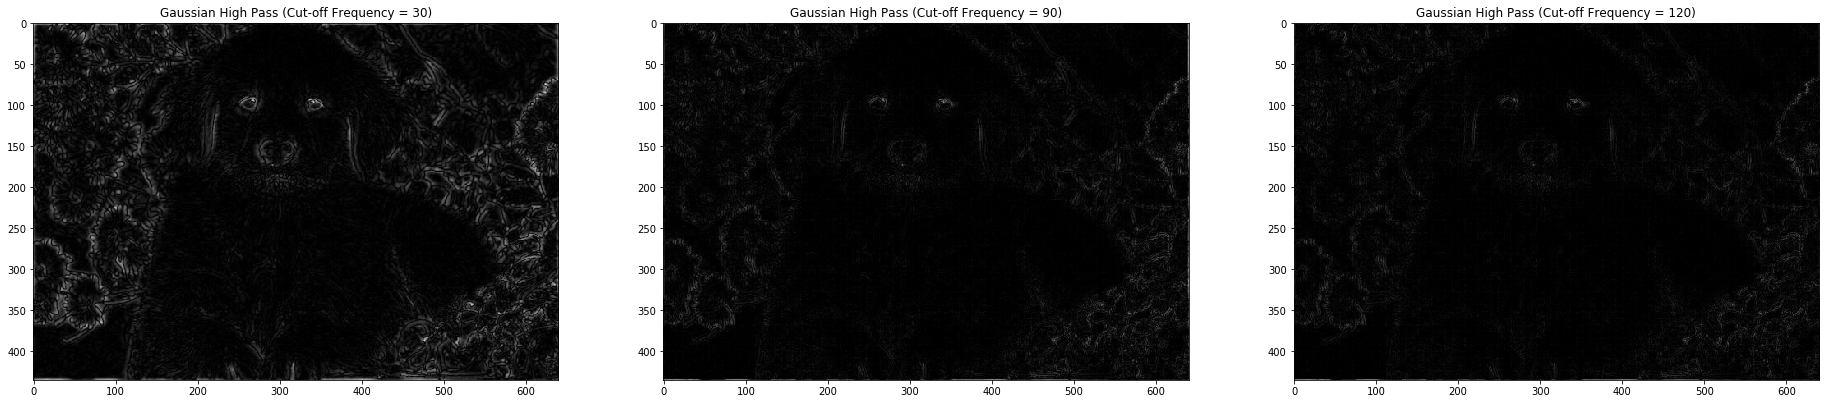

In [22]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

#Original Image
plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")


#Gaussian High Pass (Cut-off Frequency = 5)
HighPassCenter = center * gaussian_HighPass(5,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass (Cut-off Frequency = 5)")


#Gaussian High Pass (Cut-off Frequency = 15)
HighPassCenter = center * gaussian_HighPass(15,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass (Cut-off Frequency = 15)")


plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

#Gaussian High Pass (Cut-off Frequency = 30)
HighPassCenter = center * gaussian_HighPass(30,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(231), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass (Cut-off Frequency = 30)")


#Gaussian High Pass (Cut-off Frequency = 90)
HighPassCenter = center * gaussian_HighPass(90,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(232), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass (Cut-off Frequency = 90)")


#Gaussian High Pass (Cut-off Frequency = 120)
HighPassCenter = center * gaussian_HighPass(120,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(233), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass (Cut-off Frequency = 120)")

plt.show()